**Name:** PRIYADHARSHINI RAMESH

**Task:** 6

**Title:**Prediction using Decision Tree Algorithm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
file = pd.read_csv('/content/Iris.csv')
file

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
file = file.drop(['Id'], axis = 1)

In [ ]:
file

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
file.shape

(150, 5)

In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
file.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
file.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

***CORRELATION:***

In [ ]:
a = file.corr()
a

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


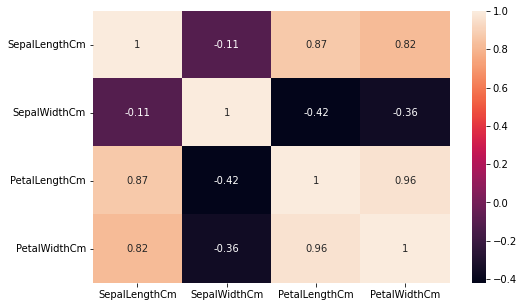

In [ ]:
plt.figure(figsize=(8,5))
sb.heatmap(a, annot = True)

**From this heatmap,**

*   Petal Length and Petal Width are positively correlated.
*   Sepal Length and Sepal Width are negatively correlated.



**DISTRIBUTION AND RELATIONSHIP BETWEEN THE SPECIES:**

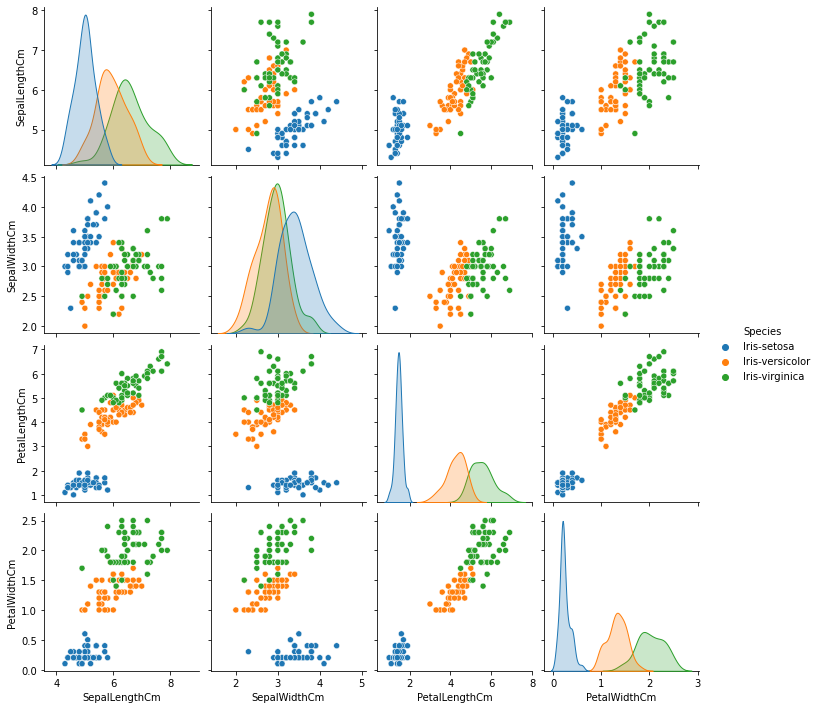

In [ ]:
sb.pairplot(file, hue = 'Species')

**From this pairplot, Iris-setosa is a isolated cluster while Iris-versicolor and Iris-virginica overlap each other.**

# **Split the data for train and test**




In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train,test=train_test_split(file, train_size=0.8,test_size=0.2)

In [ ]:
train.shape

(120, 5)

In [ ]:
test.shape

(30, 5)

In [ ]:
train_x=train.drop("Species",axis=1)
train_y=train["Species"]

In [ ]:
train_x.shape

(120, 4)

In [ ]:
train_y.shape

(120,)

In [ ]:
test_x=test.drop("Species",axis=1)
test_y=test["Species"]

In [ ]:
test_x.shape

(30, 4)

In [ ]:
test_y.shape

(30,)

**SCALING:**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
st_x= StandardScaler()  
train_x = st_x.fit_transform(train_x)    
test_x = st_x.transform(test_x)  

**Fitting Decision Tree classifier to the training set**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree=DecisionTreeClassifier(criterion='entropy')
dtree.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy')

**Predicting the test set result:**

In [ ]:
pred_y = dtree.predict(test_x)

**Classification Report:**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
classification_report(test_y, pred_y)

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00         7\nIris-versicolor       0.83      0.91      0.87        11\n Iris-virginica       0.91      0.83      0.87        12\n\n       accuracy                           0.90        30\n      macro avg       0.91      0.91      0.91        30\n   weighted avg       0.90      0.90      0.90        30\n'

In [ ]:
import sklearn.metrics as sm

In [ ]:
sm.accuracy_score(test_y, pred_y)

0.9

**Test accuracy of the result: (CONFUSION MATRIX)**

In [ ]:
cm= confusion_matrix(test_y, pred_y)
cm

array([[ 7,  0,  0],
       [ 0, 10,  1],
       [ 0,  2, 10]])

**Visualizing the test result:**

In [53]:
from sklearn.tree import plot_tree

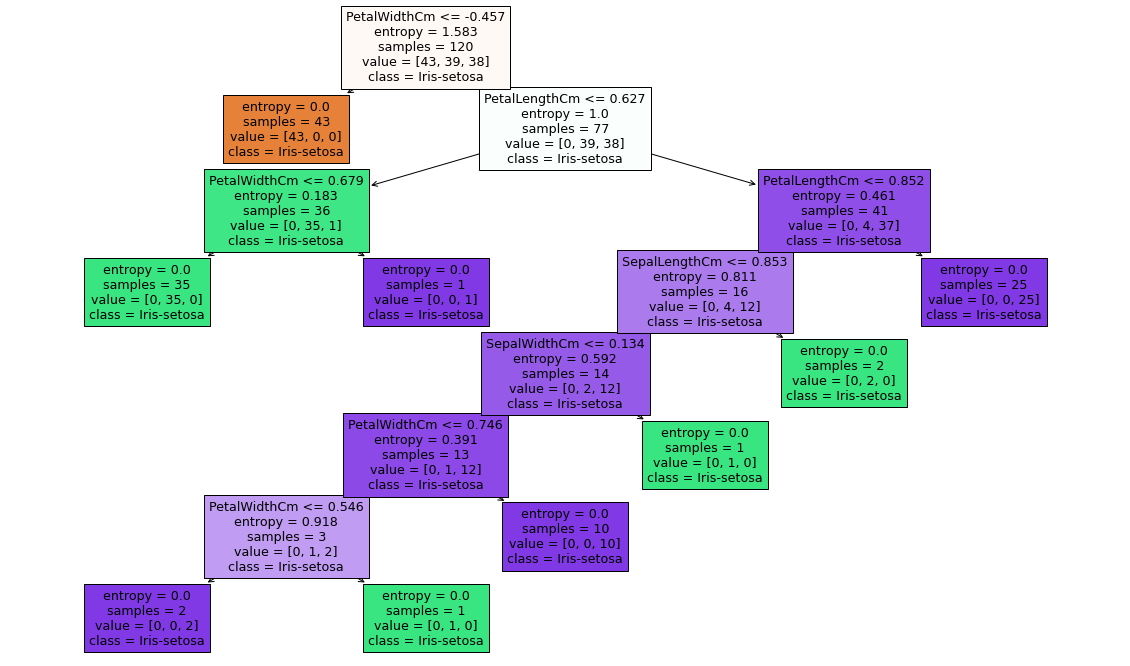

In [59]:
plt.figure(figsize = (20,12))
tree=plot_tree(dtree,feature_names=file.columns,filled = True, class_names=file['Species'].values)